#Detecting Spam with Spark

##  Classifying messages to detect spam.

### By Shakeel Raja 

Sample outputs from each cell have been added as for inspection. Test script for each cell has been commented out which can be un-commented to run it with sample data.   

## Task a) & b) Read some files and prepare a (f,w) RDD 


Following code reads file from given directory, splits the words per file, changes all words to lowercase and creates (f,w) pairs as shown in the output 

In [2]:
import re 
import numpy as np

def read_fw_RDD(argDir): # package tasks a/b into a function for later use
    
    fwL_RDD = sc.wholeTextFiles(argDir)#<<< task a) read the files

    #print('Read {} files from directory {}'.format(fwL_RDD.count(),argDir)) # status message for testing, can be disabled later on
    #print('file word count histogram') # the histogram can be useful for checking later 
    #print(fwL_RDD.map(lambda fwL: (len(fwL[1]))).histogram([0,10,100,1000,10000]))

    #Splitting into (f,wL) pairs while changinging words to lowercase
    fwL_RDD = (fwL_RDD.map(lambda x: (x[0], re.split('\W+', x[1].lower()))))
    #Generating (f,w) pairs
    fwL_RDD = fwL_RDD.flatMapValues(lambda x: x)

    return fwL_RDD

# TEST SCRIPT  
#dirPath = 'hdfs://saltdean.nsqdc.city.ac.uk./data/spam/bare/part1'
#fw_RDD = read_fw_RDD(dirPath) # for testing
#print(fw_RDD.take(3)) # for testing

### SAMPLE OUTPUT

This output shows (f,w) tuples generated from code above. 

[('hdfs://saltdean.nsqdc.city.ac.uk./data/spam/bare/part1/3-1msg1.txt', 'subject'), ('hdfs://saltdean.nsqdc.city.ac.uk./data/spam/bare/part1/3-1msg1.txt', 're'), ('hdfs://saltdean.nsqdc.city.ac.uk./data/spam/bare/part1/3-1msg1.txt', '2')]

## Task c) Normalised word count lists

Following code generates a [file[(w,c), ... ]] list for each file and creates a normalised term frequency vector for words in each file. This involves reading the data, adding 1 to each word, adding words to get term frequency and normalizing calculated term frequency. This cell gives output as [f(w,cn)....]

In [3]:
from operator import add

#Rearrange data into [f(w,c)..]
def reGrpLst(fw_c): # reorganise the tuples
    fw,c = fw_c 
    f,w = fw 
    return (f,[(w,c)]) 

def normalizer (wordCount): # calculate normalised term frequency for (w,c) pairs.
    tSum=0
    for word,count in wordCount :
        tSum += count
    return [(w,float(c/tSum)) for w,c in wordCount]

# this function reads the content of given directory and calculates 
# term frequency for for each word per file, regroups data into [f(w,c)....] for each file, 
# and normalises as [f[(w,cN)...] 
def make_f_tfLn_RDD(argDir):
    
    fw_RDD = read_fw_RDD( argDir ) \ 
    .map(lambda x: (x,1)) \
    .reduceByKey(add)\
    .map(reGrpLst) \
    .reduceByKey(add)

    #Sort words by frequency and normalize
    f_wcL_RDD = fw_RDD.map(lambda f_wcL: (f_wcL[0], sorted(f_wcL[1],key=lambda x: x[1]))) 
    f_wcLn_RDD = f_wcL_RDD.map(lambda fwC: (fwC[0], normalizer(fwC[1])))
    
    #return f_wVec_RDD #Word count List (normalized)
    return f_wcLn_RDD
    
# TEST SCRIPT  
#f_wcLn_RDD = make_f_tfLn_RDD('hdfs://saltdean/data/spam/bare/part1') # for testing
#print(f_wcLn_RDD.top(1)) # for testing
#wcLn = f_wcLn_RDD.take(1)[0][1] # get the first normalised word count list
#print('Sum of normalized word count: {} (roughly equal to 1).'.format(sum([cn for (w,cn) in wcLn]))) # the sum of normalised counts should be close to 1 

### SAMPLE OUTPUT:

[('hdfs://saltdean/data/spam/bare/part1/spmsga141.txt', [('murkowski', 0.005434782608695652), ('sending', 0.005434782608695652), ('see', 0.005434782608695652), ('cost', 0.005434782608695652), ('please', 0.005434782608695652), ('hand', 0.005434782608695652), ('reply', 0.005434782608695652), ('time', 0.005434782608695652), ('places', 0.005434782608695652), ('http', 0.005434782608695652), ('hard', 0.005434782608695652), ('under', 0.005434782608695652), ('list', 0.005434782608695652), ('if', 0.005434782608695652), ('from', 0.005434782608695652), ('bill', 0.005434782608695652), ('avoid', 0.005434782608695652), ('federal', 0.005434782608695652), ('outlined', 0.005434782608695652), ('else', 0.005434782608695652), ('each', 0.005434782608695652), ('address', 0.005434782608695652), ('e', 0.005434782608695652), ('any', 0.005434782608695652), ('creditime', 0.005434782608695652), ('immediately', 0.005434782608695652), ('states', 0.005434782608695652), ('town', 0.005434782608695652), ('mail', 0.005434782608695652), ('message', 0.005434782608695652), ('get', 0.005434782608695652), ('inability', 0.005434782608695652), ('cancel', 0.005434782608695652), ('can', 0.005434782608695652), ('aforementioned', 0.005434782608695652), ('receiving', 0.005434782608695652), ('attempts', 0.005434782608695652), ('finding', 0.005434782608695652), ('receive', 0.005434782608695652), ('com', 0.005434782608695652), ('that', 0.005434782608695652), ('try', 0.005434782608695652), ('complies', 0.005434782608695652), ('no', 0.005434782608695652), ('browser', 0.005434782608695652), ('like', 0.005434782608695652), ('may', 0.005434782608695652), ('would', 0.005434782608695652), ('accounts', 0.005434782608695652), ('search', 0.005434782608695652), ('include', 0.005434782608695652), ('do', 0.005434782608695652), ('starting', 0.005434782608695652), ('stopped', 0.005434782608695652), ('type', 0.005434782608695652), ('additional', 0.005434782608695652), ('deal', 0.005434782608695652), ('honored', 0.005434782608695652), ('united', 0.005434782608695652), ('point', 0.005434782608695652), ('must', 0.005434782608695652), ('help', 0.005434782608695652), ('proposed', 0.005434782608695652), ('', 0.005434782608695652), ('s', 0.005434782608695652), ('saying', 0.005434782608695652), ('result', 0.005434782608695652), ('anyone', 0.005434782608695652), ('is', 0.005434782608695652), ('www', 0.005434782608695652), ('haveing', 0.005434782608695652), ('commercial', 0.005434782608695652), ('of', 0.005434782608695652), ('good', 0.005434782608695652), ('in', 0.005434782608695652), ('state', 0.005434782608695652), ('addresses', 0.005434782608695652), ('where', 0.005434782608695652), ('advertisement', 0.005434782608695652), ('maybe', 0.005434782608695652), ('merchant', 0.005434782608695652), ('requirements', 0.005434782608695652), ('service', 0.005434782608695652), ('process', 0.005434782608695652), ('by', 0.010869565217391304), ('so', 0.010869565217391304), ('credit', 0.010869565217391304), ('or', 0.010869565217391304), ('and', 0.010869565217391304), ('then', 0.010869565217391304), ('information', 0.010869565217391304), ('be', 0.010869565217391304), ('this', 0.010869565217391304), ('further', 0.010869565217391304), ('are', 0.010869565217391304), ('us', 0.010869565217391304), ('give', 0.010869565217391304), ('mailings', 0.010869565217391304), ('at', 0.010869565217391304), ('subject', 0.010869565217391304), ('as', 0.010869565217391304), ('have', 0.010869565217391304), ('requests', 0.010869565217391304), ('all', 0.016304347826086956), ('will', 0.016304347826086956), ('for', 0.016304347826086956), ('email', 0.016304347826086956), ('with', 0.016304347826086956), ('remove', 0.016304347826086956), ('card', 0.016304347826086956), ('on', 0.021739130434782608), ('we', 0.021739130434782608), ('the', 0.02717391304347826), ('your', 0.02717391304347826), ('to', 0.03804347826086957), ('a', 0.03804347826086957), ('you', 0.04891304347826087)])]

Sum of normalized word count: 1.0000000000000009 (roughly equal to 1).

## Task d) Creating hashed feature vectors 
Using the hashing trick to create fixed size TF vectors.


In [4]:
# function for generating hash values for each file vector based on given size N
def hashing_vectorizer(word_count_list, N): 
    v = [0] * N  # create fixed size vector of 0s
    
    for word_count in word_count_list:         
        word,count = word_count # unpack tuple
        h = hash(word) # get hash value
        v[h % N] = v[h % N] + count # add count
        
    return v # return hashed word vector

# creating hash vector per file by sending (w,cn) to hash function and appending it to filename
def make_f_wVn_RDD(f_wcLn_RDD, argN): 
    f_wVec2_RDD = f_wcLn_RDD.map(lambda f_wc: (f_wc[0], hashing_vectorizer(f_wc[1],argN)))
    return f_wVec2_RDD 
    
    
# TEST SCRIPT    
#N=100
#dirPath = 'hdfs://saltdean.nsqdc.city.ac.uk/data/spam/bare/part1'
#f_wVn_RDD = make_f_wVn_RDD(make_f_tfLn_RDD(dirPath),N) # for testing
#print(f_wVn_RDD.top(1)) # for testing
#print( sum(f_wVn_RDD.take(1)[0][1])) # for testing

### SAMPLE OUTPUT

[('hdfs://saltdean.nsqdc.city.ac.uk/data/spam/bare/part1/spmsga141.txt', [0.021739130434782608, 0.010869565217391304, 0, 0.03260869565217391, 0, 0, 0.005434782608695652, 0, 0.005434782608695652, 0.005434782608695652, 0.005434782608695652, 0, 0.005434782608695652, 0, 0, 0.03260869565217391, 0.010869565217391304, 0.02717391304347826, 0.005434782608695652, 0.016304347826086956, 0.005434782608695652, 0.06521739130434782, 0.021739130434782608, 0.010869565217391304, 0.010869565217391304, 0.010869565217391304, 0, 0.021739130434782608, 0.016304347826086956, 0.005434782608695652, 0, 0.005434782608695652, 0, 0.005434782608695652, 0.010869565217391304, 0.005434782608695652, 0.010869565217391304, 0.016304347826086956, 0, 0.005434782608695652, 0.016304347826086956, 0.02717391304347826, 0.021739130434782608, 0, 0.005434782608695652, 0.005434782608695652, 0.005434782608695652, 0.043478260869565216, 0.005434782608695652, 0.005434782608695652, 0, 0.005434782608695652, 0.005434782608695652, 0.005434782608695652, 0, 0.010869565217391304, 0.021739130434782608, 0.016304347826086956, 0, 0.005434782608695652, 0.010869565217391304, 0.005434782608695652, 0.005434782608695652, 0.005434782608695652, 0.016304347826086956, 0.03804347826086957, 0.010869565217391304, 0.005434782608695652, 0.005434782608695652, 0.016304347826086956, 0.021739130434782608, 0, 0.021739130434782608, 0.010869565217391304, 0.010869565217391304, 0, 0, 0.016304347826086956, 0, 0.005434782608695652, 0.005434782608695652, 0.005434782608695652, 0, 0, 0.005434782608695652, 0, 0.005434782608695652, 0, 0.021739130434782608, 0.043478260869565216, 0.016304347826086956, 0, 0.021739130434782608, 0.005434782608695652, 0, 0.02717391304347826, 0, 0, 0.010869565217391304, 0.005434782608695652])]

0.9999999999999997

## Task e) Create Labeled Points

Following code determines whether the file is spam (i.e. the filename contains ’spmsg’) and replace the filename by a 1 (spam) or 0 (ham) accordingly using mllib LabelPoint function

In [5]:
#Import labeledpoint from mllib to attach labels to data
from pyspark.mllib.regression import LabeledPoint

#Function to attach labels to data
def make_lp_RDD(f_tfLn_RDD,argN):

    # make a vector
    hash_RDD = make_f_wVn_RDD(f_tfLn_RDD, argN)
    # detect spam by filename and transform into LabeledPoint objects
    lp_RDD = hash_RDD.map(lambda f_wVec: LabeledPoint(1 if re.search ('spmsg' ,f_wVec[0]) else 0,f_wVec[1])) 

    return lp_RDD 

# TEST SCRIPT    
#lp_RDD = make_lp_RDD(make_f_tfLn_RDD('hdfs://saltdean.nsqdc.city.ac.uk./data/spam/bare/part1'),100)
#print(lp_RDD.take(1))

### SAMPLE OUTPUT

Labels of 0 or 1 attached to the hash vector

[LabeledPoint(0.0, [0.019801980198,0.0792079207921,0.00990099009901,0.00990099009901,0.00990099009901,0.0,0.00990099009901,0.0,0.0,0.00990099009901,0.0,0.0,0.0,0.0,0.0,0.0,0.00990099009901,0.039603960396,0.00990099009901,0.0,0.019801980198,0.049504950495,0.019801980198,0.0,0.00990099009901,0.00990099009901,0.00990099009901,0.019801980198,0.00990099009901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00990099009901,0.0,0.00990099009901,0.0,0.0,0.0,0.0,0.039603960396,0.0,0.00990099009901,0.00990099009901,0.00990099009901,0.029702970297,0.0,0.00990099009901,0.039603960396,0.00990099009901,0.00990099009901,0.029702970297,0.019801980198,0.0,0.00990099009901,0.00990099009901,0.0,0.0,0.0,0.019801980198,0.0,0.019801980198,0.00990099009901,0.00990099009901,0.0,0.00990099009901,0.019801980198,0.00990099009901,0.0,0.019801980198,0.0,0.00990099009901,0.0,0.00990099009901,0.00990099009901,0.0,0.0693069306931,0.0,0.00990099009901,0.0,0.00990099009901,0.0,0.029702970297,0.0,0.0,0.019801980198,0.0,0.00990099009901,0.0,0.00990099009901,0.0,0.00990099009901,0.00990099009901,0.00990099009901,0.029702970297,0.019801980198])]

## Task f) Train a classifier 

Use the `LabeledPoint` objects to train the `LogisticRegression` and calculate the accuracy of the model on the training set using normalised word list as input again.  

In [6]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, NaiveBayes

path = 'hdfs://saltdean/data/spam/stop/part1'

N=100 # size of hash vector 
def trainModel(trainpath,N):
    
    #Create train directory from training path by getting term frequency and labelled point for each file
    train_RDD = make_lp_RDD(make_f_tfLn_RDD(path), N)
    
    #Apply logistic regression and Naive Bayes Models 
    model = LogisticRegressionWithLBFGS.train(train_RDD)
    #model = NaiveBayes.train(train_RDD) # uncomment to try naive bayes
    
    #Predict with training data and calculate accuracy (this will get close to 100% as the model is trained on same data)
    labels_Preds = train_RDD.map(lambda p: (p.label, model.predict(p.features)))
    trainErr = labels_Preds.filter(lambda x: x[0] != x[1]).count() / float(train_RDD.count())
    correct = labels_Preds.filter(lambda x: x[0] == x[1]).count()
    accuracy = correct/labels_Preds.count()

    print('Training {} data items gave {} correct predictions with training accuracy of {:.1%} and error of {:.1%} '.format(labels_Preds.count(), correct, accuracy, trainErr)) # output raw numbers
    return model 

#f_wcLn_RDD = make_f_tfLn_RDD(path) # for testing
#model = trainModel(path,N) # for testing
#print(model)

### SAMPLE OUTPUT
Training 289 data items gave 289 correct predictions with training accuracy of 100.0% and error of 0.0% 

(weights=[-363.307005267,-125.088207321,-165.072227295,287.388859907,122.30305052,-812.454534754,107.318355618,13.2426632602,227.865310925,-453.707612367,41.9848605925,-550.657329394,-650.426435918,404.052173404,-340.774956292,531.362347587,310.73511211,-58.1812844056,-570.055169614,-224.248795405,-91.6697147098,-26.625201643,425.509051547,269.135534,472.577950296,66.8670545364,-205.110715293,628.670296566,516.672511653,20.6506929531,1.86023040465,-101.744379394,-210.895681769,221.075858226,44.5045272705,492.667734878,688.035426155,157.669489159,1105.36027481,-634.939707953,378.321292732,219.473940462,-264.642571976,143.875341616,-809.728660427,-146.788839695,-106.203126231,-479.845256628,-81.6894429518,-411.494460719,45.8975507382,-15.8226101493,-365.155830102,-601.188343865,-417.668225645,377.100961044,-585.645516942,31.7354911258,195.328859431,87.7341097968,403.842009206,-257.317664047,-249.930713537,440.323910261,123.937673549,488.026152557,-199.023731806,415.790155674,-110.863600975,148.164444405,-117.218226185,9.08258659071,-162.306375591,-258.239434578,-384.256327793,11.3816505206,-78.7843162392,-27.4581887945,-76.6924148055,-19.0701382672,139.002600618,-558.789734616,1301.33846644,-116.735338192,367.459529957,112.837914435,-301.771559049,-123.50212083,121.70576053,173.679906734,446.422213089,-798.814469198,349.612258584,-424.226640714,108.789830458,-108.016603174,-555.510911002,-570.098055546,-164.228863695,-316.565701242], intercept=0.0)

## Task g) Test the classifier

Use the files from \texttt{.../data/extra/spam/bare/part10} and prepare them like in task~a)-e) (use the function you created in task e) and before. Then use the trained model to predict the label for each vector you have and compare it to the original to test the performance of your classifier. (10\%) 

In [7]:
path = 'hdfs://saltdean/data/spam/stop/part10'

def testModel(model,testPath,N):
    test_RDD = make_lp_RDD(make_f_tfLn_RDD(path), N)
    
    # calculating performance measures for testing phase
    labels_Preds = test_RDD.map(lambda p: (p.label, model.predict(p.features)))
    testErr = labels_Preds.filter(lambda x: x[0] != x[1]).count() / float(test_RDD.count())
    correct = labels_Preds.filter(lambda x: x[0] == x[1]).count()
    accuracy = correct/labels_Preds.count()

    print('Testing {} data items gave {} correct predictions with testing accuracy: {:.1%} , error: {:.1%} '.format(labels_Preds.count(), correct, accuracy, testErr)) # output raw numbers

    return model 

# pass the model to test function alongwith trained model and hash vector size
#tmodel = testModel(model,make_f_tfLn_RDD(path),N) # for testing
#print(tmodel)

### SAMPLE OUTPUT

Testing 291 data items gave 219 correct predictions with testing accuracy: 75.3% , error: 24.7% 

(weights=[-363.307005267,-125.088207321,-165.072227295,287.388859907,122.30305052,-812.454534754,107.318355618,13.2426632602,227.865310925,-453.707612367,41.9848605925,-550.657329394,-650.426435918,404.052173404,-340.774956292,531.362347587,310.73511211,-58.1812844056,-570.055169614,-224.248795405,-91.6697147098,-26.625201643,425.509051547,269.135534,472.577950296,66.8670545364,-205.110715293,628.670296566,516.672511653,20.6506929531,1.86023040465,-101.744379394,-210.895681769,221.075858226,44.5045272705,492.667734878,688.035426155,157.669489159,1105.36027481,-634.939707953,378.321292732,219.473940462,-264.642571976,143.875341616,-809.728660427,-146.788839695,-106.203126231,-479.845256628,-81.6894429518,-411.494460719,45.8975507382,-15.8226101493,-365.155830102,-601.188343865,-417.668225645,377.100961044,-585.645516942,31.7354911258,195.328859431,87.7341097968,403.842009206,-257.317664047,-249.930713537,440.323910261,123.937673549,488.026152557,-199.023731806,415.790155674,-110.863600975,148.164444405,-117.218226185,9.08258659071,-162.306375591,-258.239434578,-384.256327793,11.3816505206,-78.7843162392,-27.4581887945,-76.6924148055,-19.0701382672,139.002600618,-558.789734616,1301.33846644,-116.735338192,367.459529957,112.837914435,-301.771559049,-123.50212083,121.70576053,173.679906734,446.422213089,-798.814469198,349.612258584,-424.226640714,108.789830458,-108.016603174,-555.510911002,-570.098055546,-164.228863695,-316.565701242], intercept=0.0)

## Task h) Run experiments 

Packaging the whole classifier training and evaluation in one function. 
Following experiments will be conducted using TrainTestEval() function:

1. Effect of differently sized training sets
2. Effect of increasing hash vector size
3. Effect of differently processed training datasets


In [8]:
# Combine Training, Testing and Evaluation in a single function which takes in training and testing directories
# alongwith hash vector size as N
import glob
import time
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

def TrainTestEval(trainPath, testPath, N):

    # make train and test RDDs by calcultaing term frequencies and applying labeled points training and test directories  
    
    train_RDD = make_lp_RDD(make_f_tfLn_RDD(trainPath), N)
    test_RDD = make_lp_RDD(make_f_tfLn_RDD(testPath), N)
    
    # run the classifier with training data
    start_time = time.time()
    model = LogisticRegressionWithLBFGS.train(train_RDD)
    trainTime = time.time() - start_time
    
    # apply the trained classifier on training data and calculate evaluation data
    train_labels_Preds = train_RDD.map(lambda p: (p.label, model.predict(p.features)))
    trainCorrect = train_labels_Preds.filter(lambda x: x[0] == x[1]).count()
    trainAccuracy = trainCorrect/train_labels_Preds.count()

    # apply the trained classifier on testing data and calculate evaluation data
    test_labels_Preds = test_RDD.map(lambda p: (p.label, model.predict(p.features)))
    testCorrect = test_labels_Preds.filter(lambda x: x[0] == x[1]).count()
    testAccuracy = testCorrect/test_labels_Preds.count()

    # return selected performance measures for comparison and evaluation in following experiments
    return [train_labels_Preds.count(), trainTime, testAccuracy, trainAccuracy]



## Experiment 1

Increase the size of training data in steps and monitor the effect on training time and test accuracy.

EXPERIMENT 1: Testing different training set sizes
**************************************************
Constant Test Path = hdfs://saltdean/data/spam/bare/part10

Train path					Examples	Train Time	Train Accuracy	Test Accuracy
hdfs://saltdean/data/spam/bare/part[1-1]	289		4.209		100.0%		87.3%
hdfs://saltdean/data/spam/bare/part[1-2]	578		6.512		100.0%		91.4%
hdfs://saltdean/data/spam/bare/part[1-3]	867		8.953		100.0%		91.1%
hdfs://saltdean/data/spam/bare/part[1-4]	1156		11.908		100.0%		91.1%
hdfs://saltdean/data/spam/bare/part[1-5]	1446		15.286		100.0%		90.7%
hdfs://saltdean/data/spam/bare/part[1-6]	1735		17.631		98.4%		94.2%
hdfs://saltdean/data/spam/bare/part[1-7]	2024		20.877		98.3%		96.2%
hdfs://saltdean/data/spam/bare/part[1-8]	2313		22.565		97.6%		94.5%
hdfs://saltdean/data/spam/bare/part[1-9]	2602		24.095		97.6%		94.8%


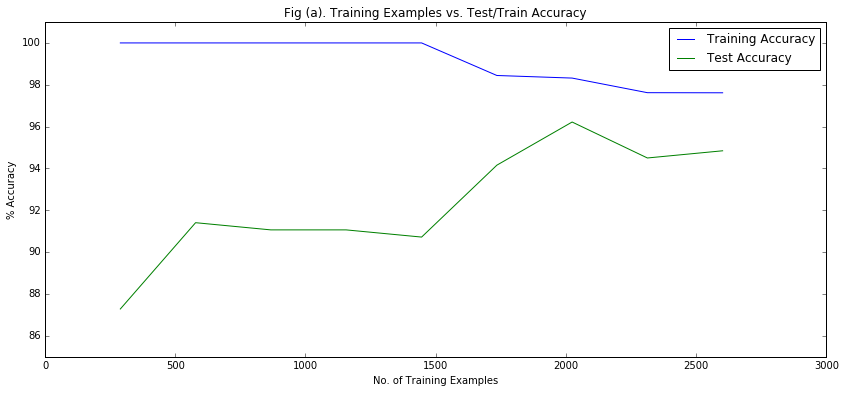

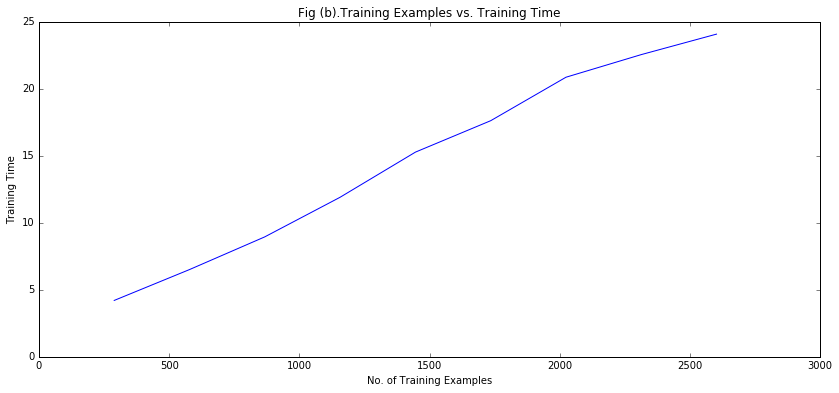

In [10]:
dirPattern = 'hdfs://saltdean/data/spam/bare/part[1-{}]' 
testPath = 'hdfs://saltdean/data/spam/bare/part10'

print('EXPERIMENT 1: Testing different training set sizes')
print('**************************************************')
print('Constant Test Path = {}'.format(testPath))
print('\nTrain path\t\t\t\t\tExamples\tTrain Time\tTrain Accuracy\tTest Accuracy')

N = 100
evalData = [] # empty array for storing performance data

for i in range(9): # increase training size by adding directories recursively
    trainPath = dirPattern.format(i+1) 
    data = TrainTestEval(trainPath, testPath, N)   
    print('{}\t{}\t\t{}\t\t{:.1%}\t\t{:.1%}'.format(str(trainPath), data[0],("%0.3f" % data[1]),data[3], data[2]))
    evalData.append(data) # collect performance measures
    
#Storing the collected performance measures into a dataframe for plotting comparison graph
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(evalData)
df.columns = ['trainEx', 'trainTime', 'testAccuracy', 'trainAccuracy']

plt.figure(figsize=(14,6))
training_accuracy, = plt.plot(df.trainEx, df.trainAccuracy*100,label="Training Accuracy");
test_accuracy, = plt.plot(df.trainEx, df.testAccuracy*100,label="Test Accuracy");
plt.legend(handles=[training_accuracy,test_accuracy])
plt.title('Fig (a). Training Examples vs. Test/Train Accuracy'), plt.xlabel('No. of Training Examples'), plt.ylabel('% Accuracy')
plt.ylim([85,101]), plt.show()
plt.figure(figsize=(14,6))
plt.plot(df.trainEx, df.trainTime)
plt.title('Fig (b).Training Examples vs. Training Time'),plt.xlabel('No. of Training Examples'), plt.ylabel('Training Time')
plt.show()

### Comments on Experiment 1

This experiment highlights the effect of training data size on training time and testing accuracy. Fig (a) highlights a high training accuracy of 100% with a lower test accuracy with only one training directory. The overfitting of the training data is reduced as the sample size gets close to 2000 and testing accuracy starts to increase. This fact demonstrates that size of training data plays a crucial role towards improved classification and to reduce overfitting.   

The output in Fig (b) shows an almost proportional relationship between size of training data and time taken during the training phase. A slight increase in overall test accuracy can also be viewed from the output and the plot as training data increases. With a roughly ten-fold increase in data size, the training time increases by a factor of 6 and a 2% overall increase in test accuracy is also observed. 

These observations can lead to a conclusion that for critical applications, i.e. scientific and technical document classifications, it would be advisable to use to use a bigger data size to ensure highest possible accuracy of results. For time critical text analytics (i.e. online document classification), a compromise would have to be made between perfromance and accuracy as training on increasingly large datasets may become computationally expensive and may not fulfil required level of agility. 

### EXPERIMENT 2

Increase the size of Hash Vector size and monitor the impact on accuracy and training time. 

EXPERIMENT 2: Testing different vector sizes
********************************************
N	Train Time	Train Accuracy	Test Acuracy
10	25.978		84.3%		85.2%
30	24.917		90.5%		87.6%
100	25.393		97.6%		94.8%
300	26.077		100.0%		97.6%
1000	26.481		100.0%		98.6%
1500	26.117		100.0%		98.3%
2000	27.260		100.0%		99.3%
3000	26.622		100.0%		99.0%
10000	36.324		100.0%		97.6%
30000	50.788		100.0%		96.9%


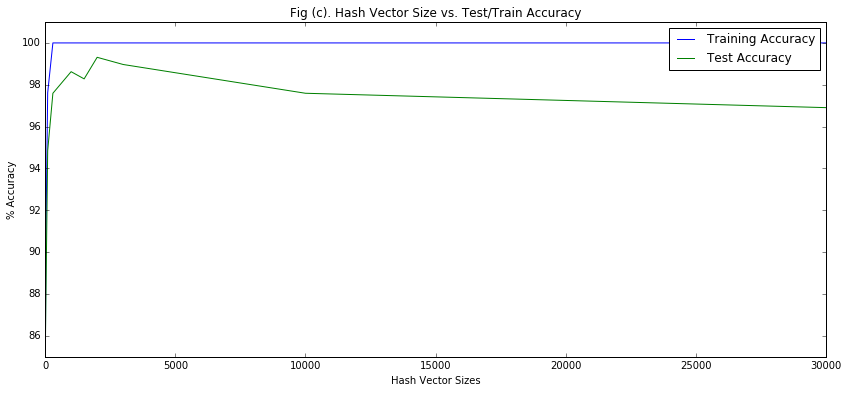

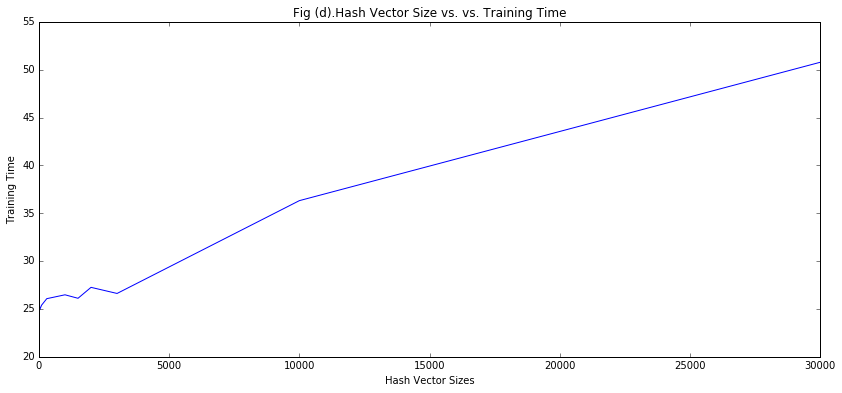

In [11]:
print('EXPERIMENT 2: Testing different vector sizes')
print('********************************************')
print('N\tTrain Time\tTrain Accuracy\tTest Acuracy')

# array with increasing values of N to try as hash vector size
NSize = [10,30,100,300,1000,1500,2000,3000,10000,30000]

trainPath = 'hdfs://saltdean/data/spam/bare/part[1-9]'
testPath = 'hdfs://saltdean/data/spam/bare/part10'

evalData2 = [] # for storing evaluation data

for n in NSize: # loop through NSize, increasing the value in each iteration
    data2 = TrainTestEval(trainPath, testPath, n)   
    print('{}\t{}\t\t{:.1%}\t\t{:.1%}'.format(n,("%0.3f" % data2[1]),data2[3],data2[2]))
    data2.extend([n])
    evalData2.append(data2)

#Storing the collected performance measures into a dataframe and plotting evaluation graphs
import pandas as pd
import matplotlib.pyplot as plt
df2 = pd.DataFrame(evalData2)
df2.columns = ['trainEx','trainTime', 'testAccuracy', 'trainAccuracy','N']
plt.figure(figsize=(14,6))
training_accuracy, = plt.plot(df2.N, df2.trainAccuracy*100,label="Training Accuracy");
test_accuracy, = plt.plot(df2.N, df2.testAccuracy*100,label="Test Accuracy");
plt.legend(handles=[training_accuracy,test_accuracy])
plt.title('Fig (c). Hash Vector Size vs. Test/Train Accuracy'), plt.xlabel('Hash Vector Sizes'), plt.ylabel('% Accuracy')
plt.ylim([85,101])
plt.show()
plt.figure(figsize=(14,6))
plt.plot(df2.N, df2.trainTime)
plt.title('Fig (d).Hash Vector Size vs. vs. Training Time'),plt.xlabel('Hash Vector Sizes'), plt.ylabel('Training Time')
plt.show()


### Comments on Experiment 2

This experiment monitors the impact of hash vector size of testing and training accuracy, as well as time taken during the training phase. Fig (c) alongwith the output shows lower training and testing accuracy at very small size of N(i.e. 10). With an increase of training size according to defined steps, training accuracy quickly moves to 100% while the test accuracy peaks 99.3% at N = 2000. Fig (c) shows the effect of hash vector size on training time which increases from 20 sec (N= 10) to 47 sec (N= 30000). The optimal value of N is seen to be at N = 2000 where the classifier gives a training accuacy of 99.3% with a training time of 22.37 seconds. 

An increasing hash vector size would ensure the inclusion of new words, differently spelled words from new data which may result in better classification, but may become become computationally more expensive in a performance oriented context. The hash vector size, therefore, must be chosen based on availability of computing resources, nature of problem while finding the right balance between time and accuracy.   

### EXPERIMENT 3

Monitor the impact of differently pre-processed datasets on training, testing accuracy and training time.

In [15]:
N = 2000 # based on observation from experiment 2

print('\nEXPERIMENT 3: Testing differently preprocessed data sets')
print('**********************************************************')
print('\ntraining on parts 1-9, testing on part 10 with N = {}'.format(N))

prefix = 'hdfs://saltdean/data/spam/'

# Dictionary with labels and training data locations
setDict = {'No preprocessing            ': prefix + 'bare/',
           'Stopwords removed           ': prefix + 'stop/',
           'Lemmatised                  ': prefix + 'lemm/',
           'Lemmatised+stopwords removed': prefix + 'lemm_stop/'}

print('\nPre-Processing\t\t\t\tTraining Time\t\tTrain Accuracy\tTest Accuracy\n')
evalData3 = []

for sp in setDict: # loop through setDict trying different training locations  

    testPath = setDict[sp] + 'part' + str(10)
    trainPath = setDict[sp] + 'part[1-9]' 
    data3 = TrainTestEval(trainPath, testPath, N)
    evalData3.append(data)
    
    # print the output 
    print('{}\t\t{}\t\t\t{:.1%}\t\t{:.1%}'.format(sp,"%0.3f" % data3[1], data3[3], data3[2]))



EXPERIMENT 3: Testing differently preprocessed data sets
**********************************************************

training on parts 1-9, testing on part 10 with N = 2000

Pre-Processing				Training Time		Train Accuracy	Test Accuracy

No preprocessing            		26.884			100.0%		99.3%
Stopwords removed           		26.718			100.0%		99.0%
Lemmatised                  		26.492			100.0%		99.0%
Lemmatised+stopwords removed		24.704			100.0%		99.0%


### Comments on Experiment 3
Training on different pre-processed datasets highlights some changes in testing accuracy and training times with a hash vector size of 2000 as indicated by previous experiment. Withoutany pre-processing, the training data gave highest test accuracy of 99.3% but took slightly longer time than other datasets. The effect of lemmatisation and stop word removal slightly reduces training time and fastest training is seen with both lemmatisation and stop word removal with 24.704 and an accuracy of 99%. 

The effect may scale up with much larger datasets and must be considered in depth to choose the right balance between pre-processing and requred level of accuracy. Pre-Processing text according to domain needs may reduce the training time while not reducing the testing accuracy too much. 

## Conclusion

Above experiments highlight some basic yet important practices in text classification of big data. Logistic regression has been applied to a number of training sets based on data size, hash vector size and pre-processing. The results re-affirm the important principles of text analytics i.e. increasing testing accuracy and training time with larger training datasets and hashvector sizes and reduced computation while training on pre-processed data. 